In [1]:
using Pkg
Pkg.activate("..")
using Revise
using FUSE
using Plots; gr();τ

  Activating project at `~/Coding/julia/FUSE`
┌ Info: Precompiling FUSE [e64856f0-3bb8-4376-b4b7-c03396503992]
└ @ Base loading.jl:1423


LoadError: UndefVarError: τ not defined

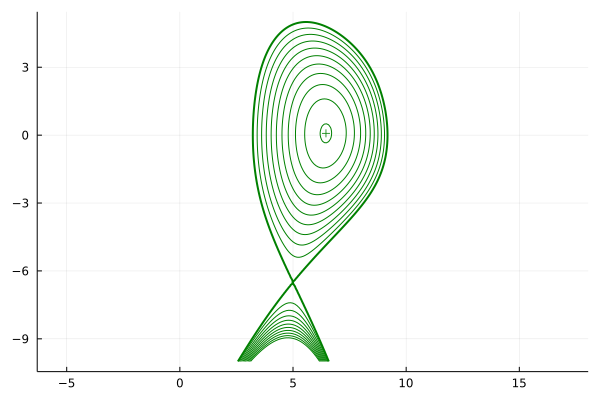

 * Status: success

 * Candidate solution
    Final objective value:     2.634869e-04

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-03

 * Work counters
    Seconds run:   2  (vs limit Inf)
    Iterations:    36
    f(x) calls:    70

  2.637903 seconds (42.48 M allocations: 672.367 MiB, 1.58% gc time)
(dd.equilibrium.time_slice[]).global_quantities.beta_tor = 0.018538831972279315
(dd.equilibrium.time_slice[]).global_quantities.beta_pol = 1.026350289869195
(dd.equilibrium.time_slice[]).global_quantities.beta_normal = 1.8758347713832044
(dd.equilibrium.time_slice[]).global_quantities.ip = 1.5588225003711341e7


In [38]:
if true
    ϵ = 0.48
    κ = 1.68
    δ = 0.21
    R0 = 6.2
    B0 = 5.3
    ip = 15.E6
    βn = 2.0
    x_point = (5.0, -6.5)
    symmetric=true

    resolution = 129

    dd = IMAS.dd()

    eqt=resize!(dd.equilibrium.time_slice,-1.0)[end]    
    eqt=resize!(dd.equilibrium.time_slice)[end]
    FUSE.init(dd.equilibrium; B0, R0, ϵ, δ, κ, beta_n=βn, ip, x_point=x_point)
    
    eqactor = FUSE.SolovevEquilibriumActor(dd, symmetric=symmetric)
    @time FUSE.step(eqactor,verbose=true)
    FUSE.finalize(eqactor, resolution, (maximum([R0*(1-ϵ*2), 0.0]), R0*(1+ϵ*2)), (-R0*ϵ*κ*2, R0*ϵ*κ*2))
    eqt.global_quantities.li_3 = 1.0 # made up!

elseif false
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","CAT_eq_ods.json")
    dd = IMAS.json2imas(filename);
    @time IMAS.flux_surfaces(dd.equilibrium);
    nothing
else
    filename = joinpath(dirname(abspath(@__FILE__)), "..", "sample","ITER_eq_ods.json")
    dd = IMAS.json2imas(filename);
    dd.equilibrium.time=[0.0]
    @time IMAS.flux_surfaces(dd.equilibrium);
    nothing
end

display(plot(dd.equilibrium.time_slice[], color=:green, psi_levels_out=[]))
@show dd.equilibrium.time_slice[].global_quantities.beta_tor
@show dd.equilibrium.time_slice[].global_quantities.beta_pol
@show dd.equilibrium.time_slice[].global_quantities.beta_normal
@show dd.equilibrium.time_slice[].global_quantities.ip;

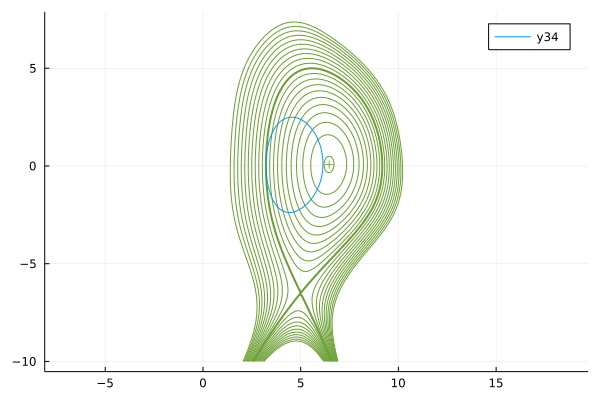

In [39]:
dd.equilibrium.time_slice[1]= FUSE.field_null_surface(dd.equilibrium.time_slice[])
dd.equilibrium.vacuum_toroidal_field.b0[1]=@ddtime(dd.equilibrium.vacuum_toroidal_field.b0)

plot(dd.equilibrium.time_slice[2])
plot!(dd.equilibrium.time_slice[1].boundary.outline.r,dd.equilibrium.time_slice[1].boundary.outline.z)

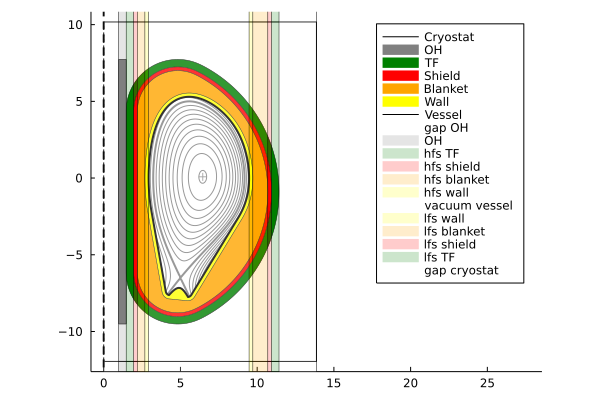

In [40]:
# initialize radial build IDS
eq = dd.equilibrium
cp = dd.core_profiles
rb = dd.radial_build

FUSE.init(rb, eq, tf_shape_index=3, is_nuclear_facility=true, pf_inside_tf=false, pf_outside_tf=true);
FUSE.init(cp, ejima=0.4);

# run FluxSwingActor
ohactor = FUSE.FluxSwingActor(dd)
FUSE.step(ohactor)
FUSE.finalize(ohactor)

plot(eq,color=:gray)
plot!(rb,outline=true)
display(plot!(rb,cx=false))

In [55]:
# initialize pf actor
pfoptactor = PFcoilsOptActor(dd.equilibrium, dd.radial_build, dd.pf_active, [6, 6]; coil_model=:simple)
FUSE.step(pfoptactor, λ_ψ=1E-2, λ_null=1E+2, λ_currents=1E5, verbose=true, symmetric=true, maxiter=10000, optimization_scheme=:static);
FUSE.finalize(pfoptactor);

0.02970015961342963
0.02970015961342963
0.02970015961342963
0.02970015961342963
0.02970015961342963
0.02970015961342963
0.02970015961342963
0.02970016184416926
0.02970016184416926
0.02970015961342963
 * Status: success

 * Candidate solution
    Final objective value:     2.970016e-02

 * Found with
    Algorithm:     Nelder-Mead

 * Convergence measures
    √(Σ(yᵢ-ȳ)²)/n ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit 120)
    Iterations:    0
    f(x) calls:    9



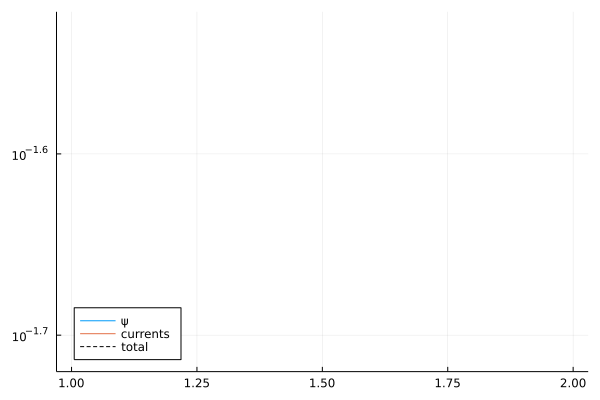

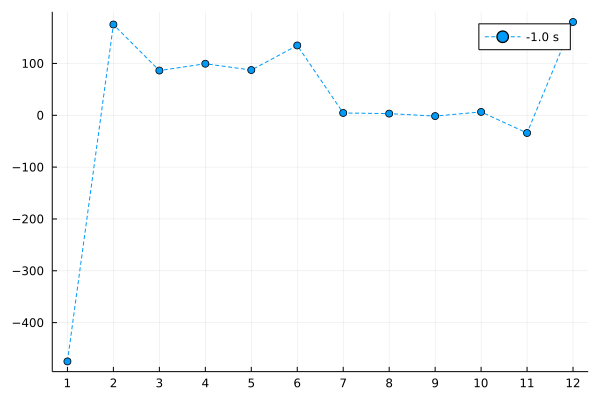

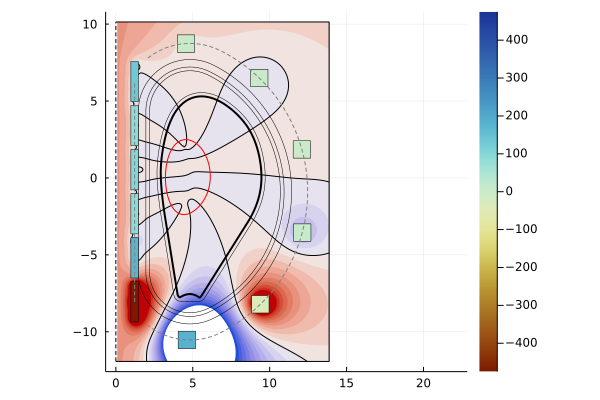

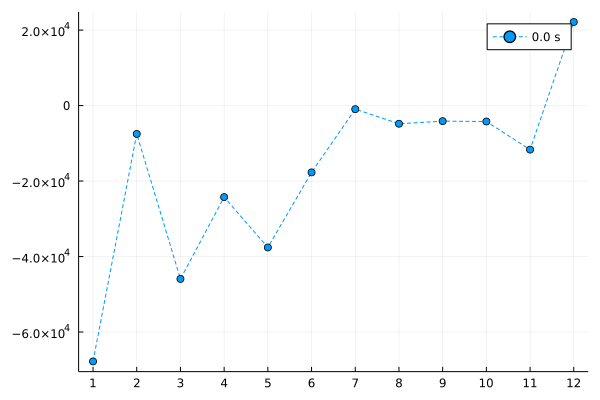

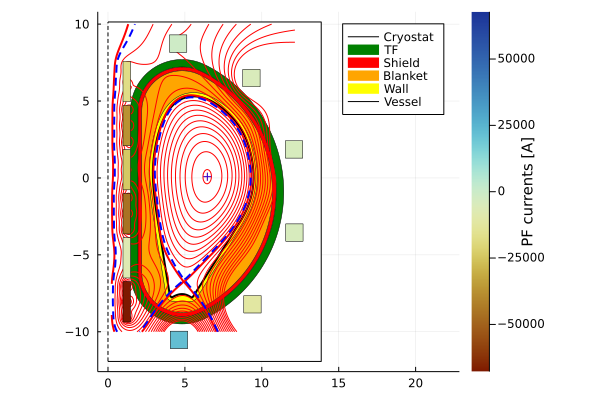

In [56]:
display(plot(pfoptactor.trace,:cost,start_at=1))

display(plot(pfoptactor.pf_active,:currents, time_index=1))
display(plot(pfoptactor,equilibrium=true,rail=true,time_index=1))

display(plot(pfoptactor.pf_active,:currents, time_index=2))
display(plot(pfoptactor,equilibrium=true,time_index=2))

In [57]:
# run pf actor
FUSE.step(pfoptactor, λ_ψ=1E-2, λ_null=1E+2, λ_currents=1E5, verbose=true, symmetric=true, maxiter=10000, optimization_scheme=:rail);
FUSE.finalize(pfoptactor);

0.03927685662146945
0.037553284197648286
0.03751871887032671
0.03815046837378521
0.06646124790904745
0.19689436564444773
0.2111896715556324
0.03927685662795073
0.03927685662795073
0.1357775228310983
0.1357775228310983
0.14580702119063632
0.1198612938835399
0.1198612938835399
0.21244855009738461
0.15211001750010814
0.037539228339409286
0.038677623010854804
0.03896413946993371
0.03896413947221554
0.06053836393207494
0.11090038755849885
0.12230646289162037
0.12230646289162037
0.26674827590110217
0.10413825326742272
0.10413825326742272
0.1044197793961639
0.054073506630199164
0.054073506630199164
0.24324193508059663
0.078122874182697
0.078122874182697
0.15584561809780775
0.06338844812106924
0.06338844812106924
0.09054194428732484
0.054426113032421
0.054426113032421
0.03897347434834991
0.03897347434834991
0.05109287274426848
0.05109287274426848
0.06785226840957753
0.038144593710932206
0.038144593710932206
0.05580694084449043
0.03581038620642869
0.03581038620642869
0.057066594027530185
0.0329

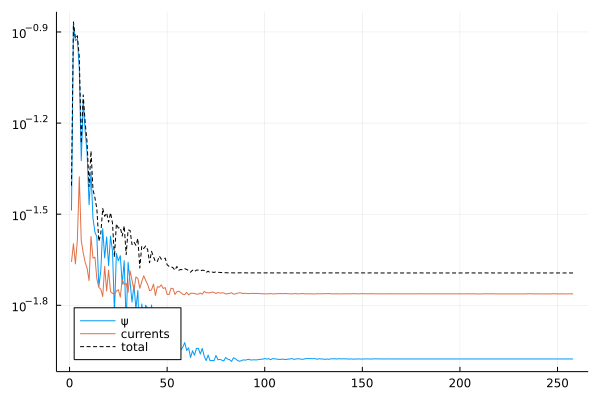

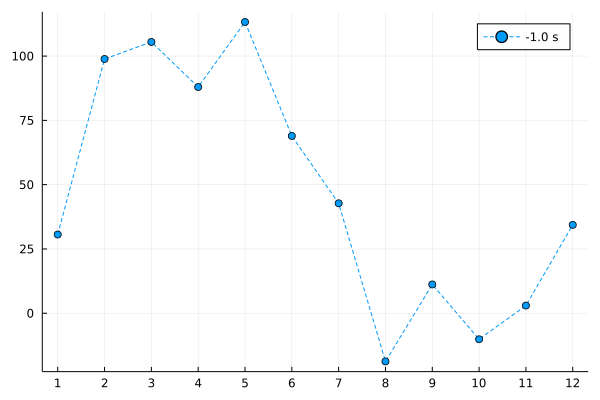

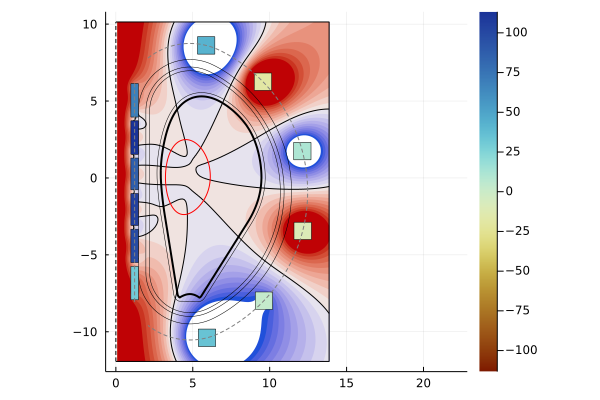

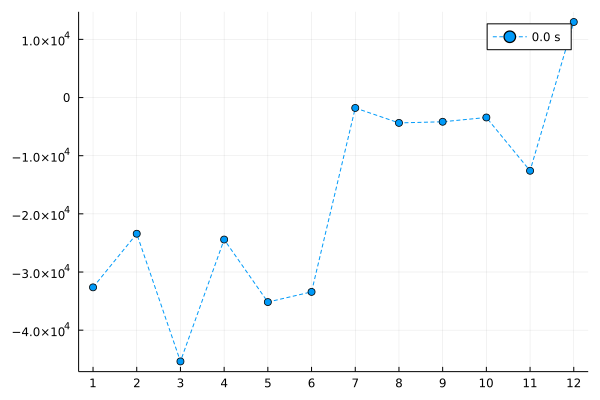

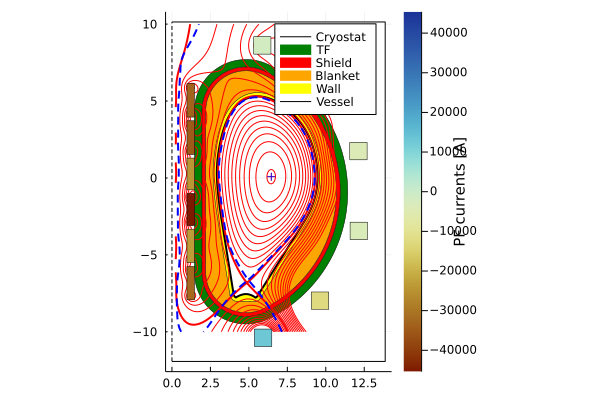

In [59]:
display(plot(pfoptactor.trace,:cost,start_at=1))

display(plot(pfoptactor.pf_active,:currents, time_index=1))
display(plot(pfoptactor,equilibrium=true,rail=true,time_index=1))

display(plot(pfoptactor.pf_active,:currents, time_index=2))
display(plot(pfoptactor,equilibrium=true,time_index=2,plot_r_buffer=1.0))

#IMAS.imas2json(rb,"radial_build_4.json")

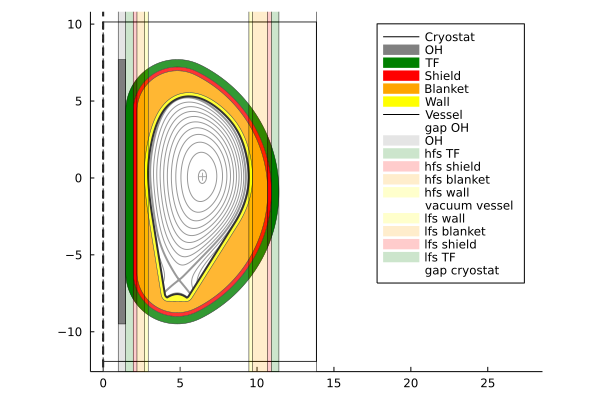

In [52]:

IMAS.flux_surfaces(pfoptactor.eq_out.time_slice[])
dd.equilibrium=pfoptactor.eq_out
eq=dd.equilibrium

FUSE.init(rb, eq, tf_shape_index=3, is_nuclear_facility=true, pf_inside_tf=false, pf_outside_tf=true);
FUSE.init(cp, ejima=0.4);

# run FluxSwingActor
ohactor = FUSE.FluxSwingActor(dd)
FUSE.step(ohactor)
FUSE.finalize(ohactor)

plot(eq,color=:gray)
plot!(rb,outline=true)
display(plot!(rb,cx=false))